In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.formula.api as smf 
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

### 1) Importing Dataset

In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col=0, parse_dates=True)
df

C:\Users\Harshad Oak\AppData\Local\Temp\ipykernel_24572\1094929805.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col=0, parse_dates=True)


,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


### 2) Visualizations

In [6]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col = 0,header = 0,parse_dates = True)
df

C:\Users\Harshad Oak\AppData\Local\Temp\ipykernel_24572\2636868239.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col = 0,header = 0,parse_dates = True)


,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [7]:
df.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

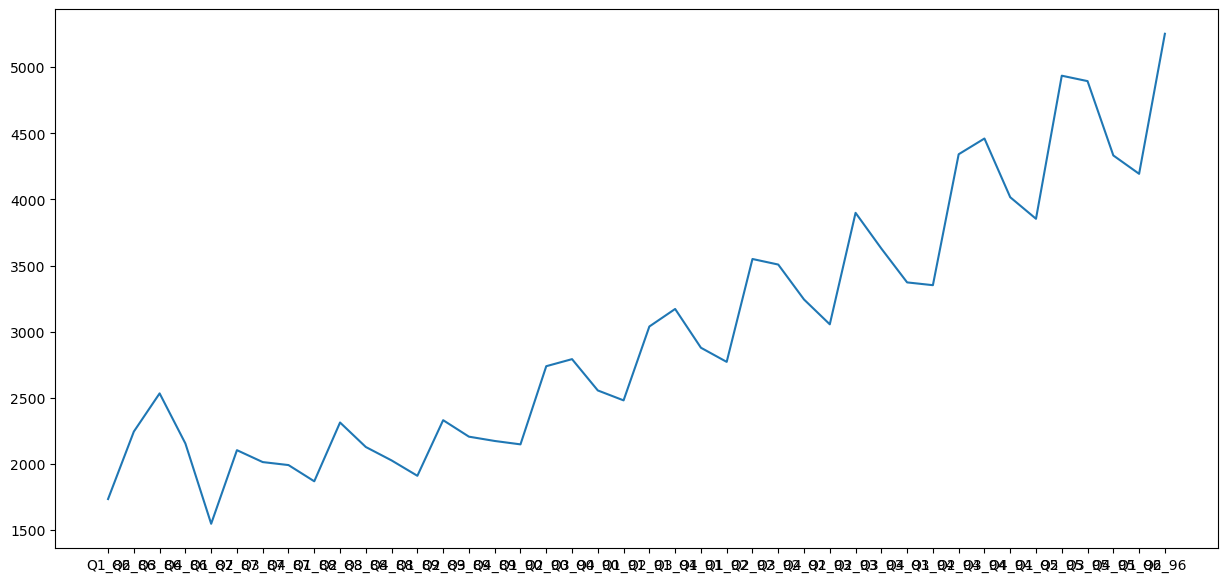

In [8]:
plt.figure(figsize = (15,7))
plt.plot(df);

##### Histogram and Density Plots

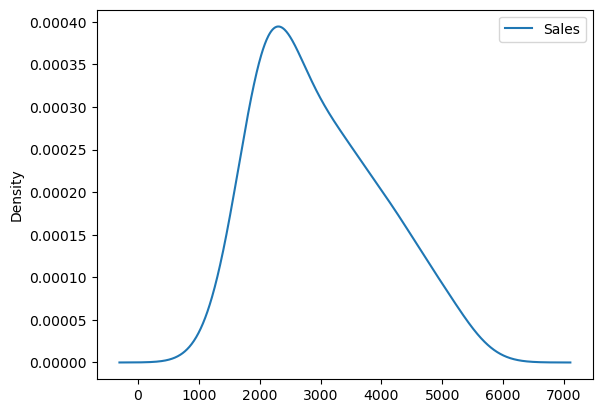

In [10]:
df.plot(kind='kde');

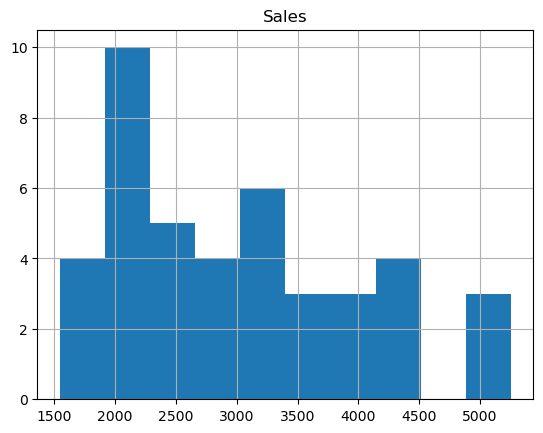

In [12]:
df.hist();

##### Lag plot

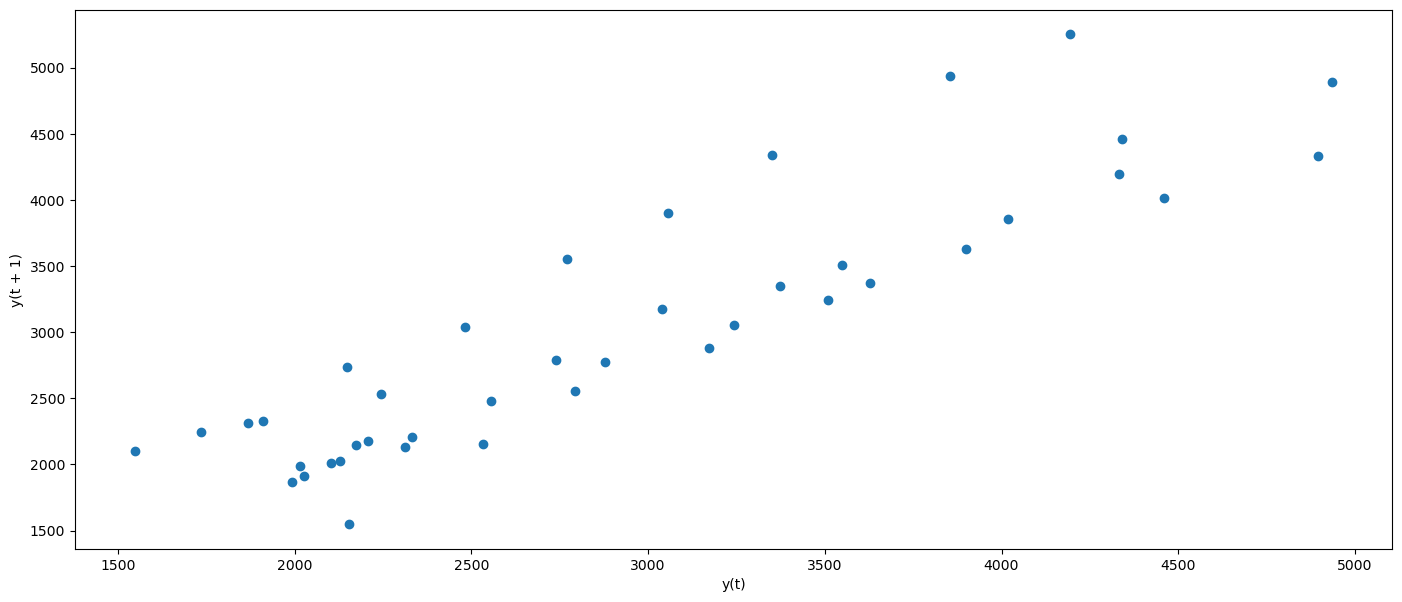

In [14]:
plt.figure(figsize = (17,7))
pd.plotting.lag_plot(df);

##### Autocorrection Plot

<Figure size 5000x1500 with 0 Axes>

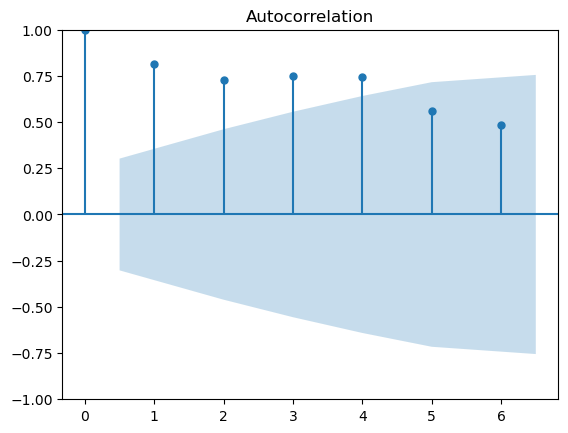

In [18]:
plt.figure(figsize = (50,15))
plot_acf(df, lags=6)
plt.show()

##### Box and Whisker Plots 

In [19]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col = 0,header = 0,parse_dates = True).squeeze("columns")
df

C:\Users\Harshad Oak\AppData\Local\Temp\ipykernel_24572\882400854.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col = 0,header = 0,parse_dates = True).squeeze("columns")


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

### 3) Sampling and Basic Transformations

In [20]:
df

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [21]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [22]:
quarter =['Q1','Q2','Q3','Q4']

In [23]:
p = df["Quarter"][0]
p[0:2]
df['quarter']= 0
for i in range(42):
    p = df["Quarter"][i]
    df['quarter'][i]= p[0:2]
df

C:\Users\Harshad Oak\AppData\Local\Temp\ipykernel_24572\711407866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]= p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [24]:
quarter_dummies = pd.DataFrame(pd.get_dummies(df['quarter']))
quarter_dummies

,Q1,Q2,Q3,Q4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True
8,True,False,False,False
9,False,True,False,False


In [26]:
df=pd.concat([df,quarter_dummies],axis=1)
df

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,True,False,False,False
1,Q2_86,2244.960999,Q2,False,True,False,False
2,Q3_86,2533.804993,Q3,False,False,True,False
3,Q4_86,2154.962997,Q4,False,False,False,True
4,Q1_87,1547.818996,Q1,True,False,False,False
5,Q2_87,2104.411995,Q2,False,True,False,False
6,Q3_87,2014.362999,Q3,False,False,True,False
7,Q4_87,1991.746998,Q4,False,False,False,True
8,Q1_88,1869.049999,Q1,True,False,False,False
9,Q2_88,2313.631996,Q2,False,True,False,False


In [27]:
df['t']=np.arange(1,43)
df['t_square']=np.square(df.t)
df['log_Sales']=np.log(df.Sales)
df

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


### 4) Forecasting

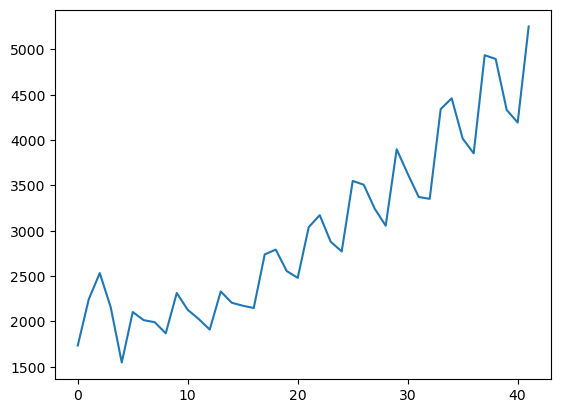

In [29]:
df['Sales'].plot();

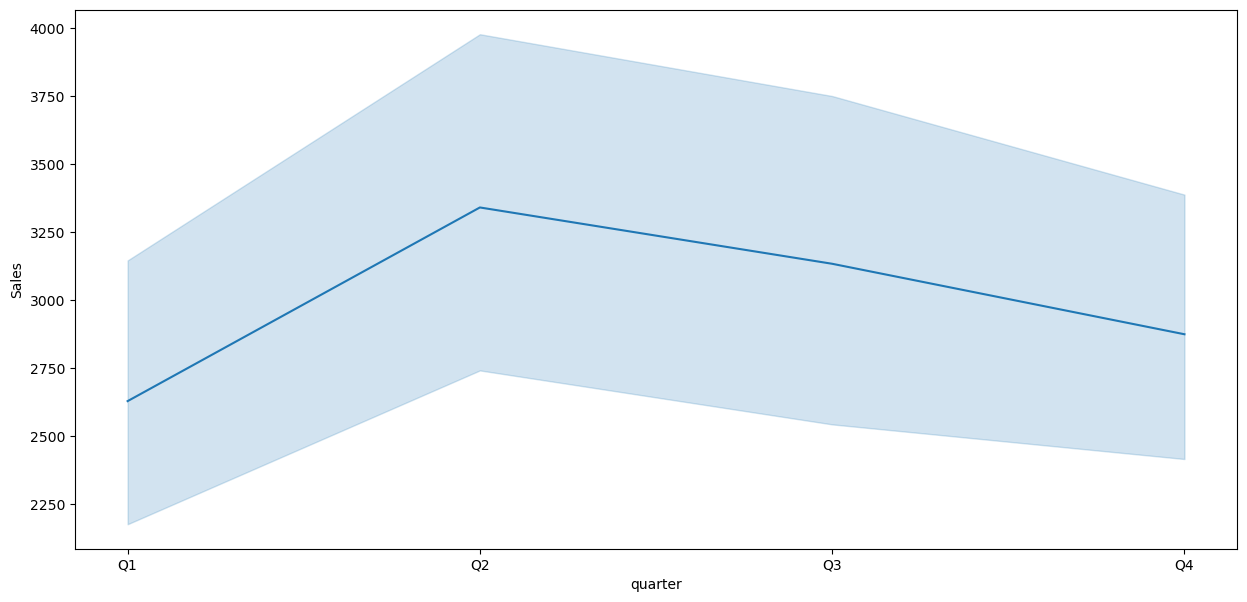

In [31]:
plt.figure(figsize=(15,7))
sns.lineplot(x="quarter",y="Sales",data=df);

##### Splitting data

In [32]:
Train = df.head(25)
Test = df.tail(7)

In [33]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


In [34]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,Q4,False,False,False,True,36,1296,8.298291
36,Q1_95,3854.0,Q1,True,False,False,False,37,1369,8.256867
37,Q2_95,4936.0,Q2,False,True,False,False,38,1444,8.504311
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


##### Linear Model

In [36]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1191.9149910119424

##### Exponential

In [37]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

985.899754530735

##### Quadratic 

In [38]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

825.0423176019441

##### Additive seasonality

In [39]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2223.0393341466033

##### Additive Seasonality Quadratic 

In [40]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1167.8830159280415

##### Multiplicative Seasonality

In [42]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2249.1183555973284

##### Multiplicative Additive Seasonality 

In [43]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

855.108185123443

##### Multiplicative Seasonality Quadratic

In [44]:
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.079135663087

In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,825.042318
6,rmse_Mult_add_sea,855.108185
1,rmse_Exp,985.899755
4,rmse_add_sea_quad,1167.883016
0,rmse_linear,1191.914991
3,rmse_add_sea,2223.039334
5,rmse_Mult_sea,2249.118356


##### Building a Model

In [46]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=df).fit()

In [48]:
pred_new  = pd.Series(model_full.predict(df))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [49]:
df["forecasted_Sales"] = pd.Series(np.exp(pred_new))

C:\Users\Harshad Oak\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


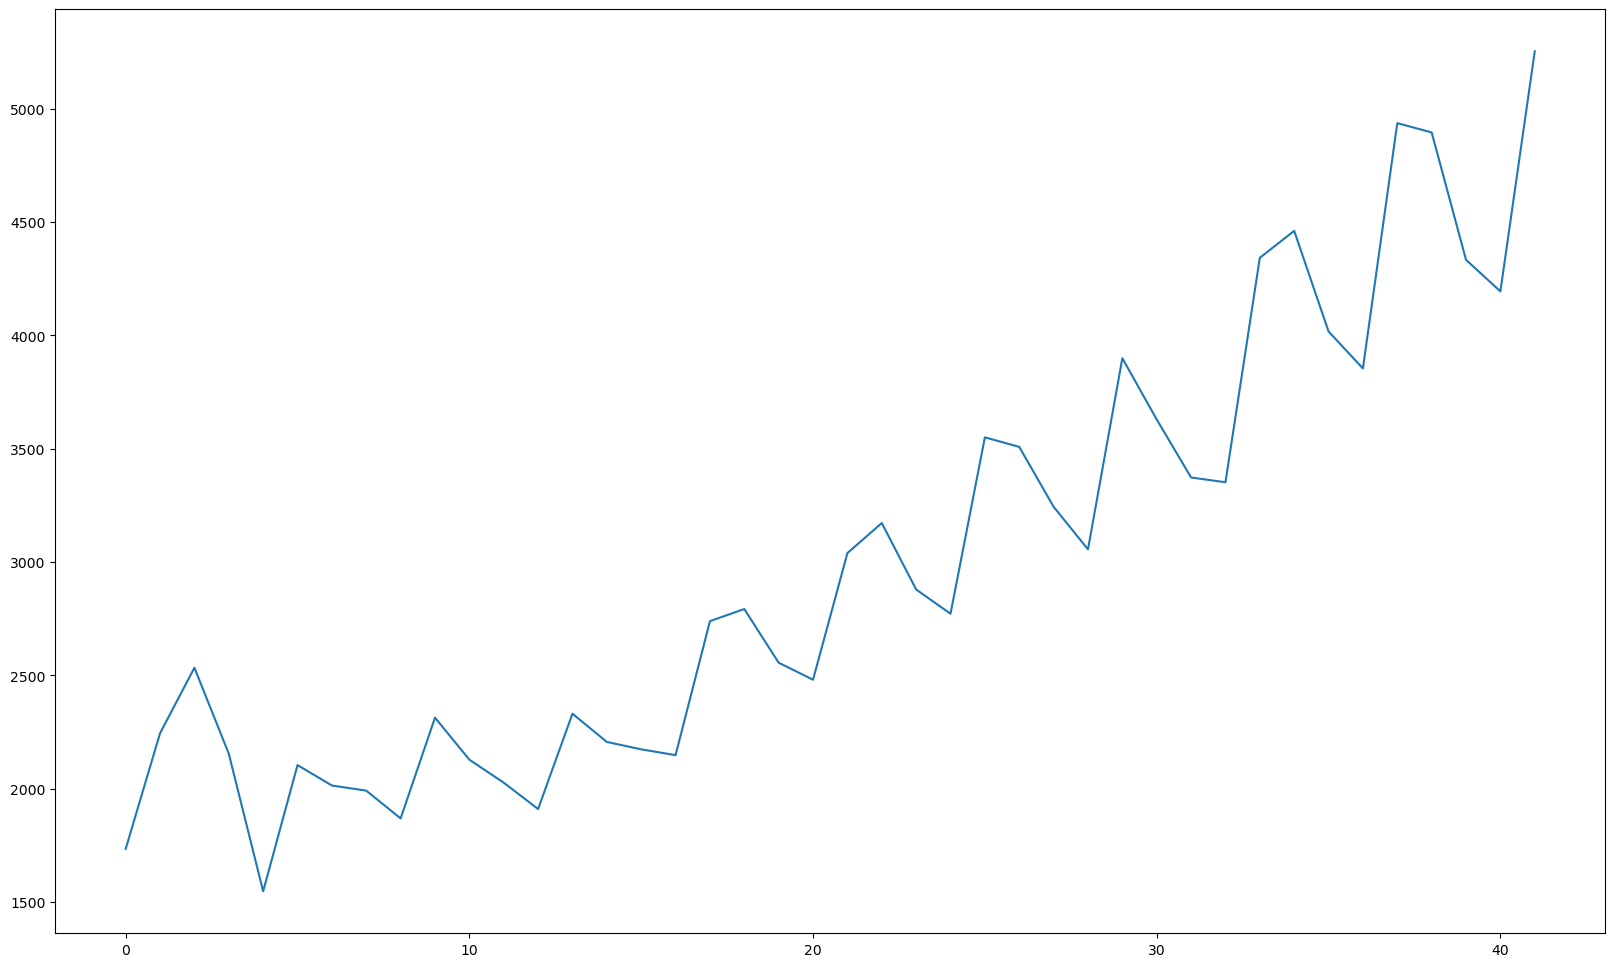

In [51]:
plt.figure(figsize=(20,12))
plt.plot(df[['Sales','forecasted_Sales']].reset_index(drop=True));

### 5) Moving Average

In [53]:
Train = df.head(35)
Test = df.tail(7)

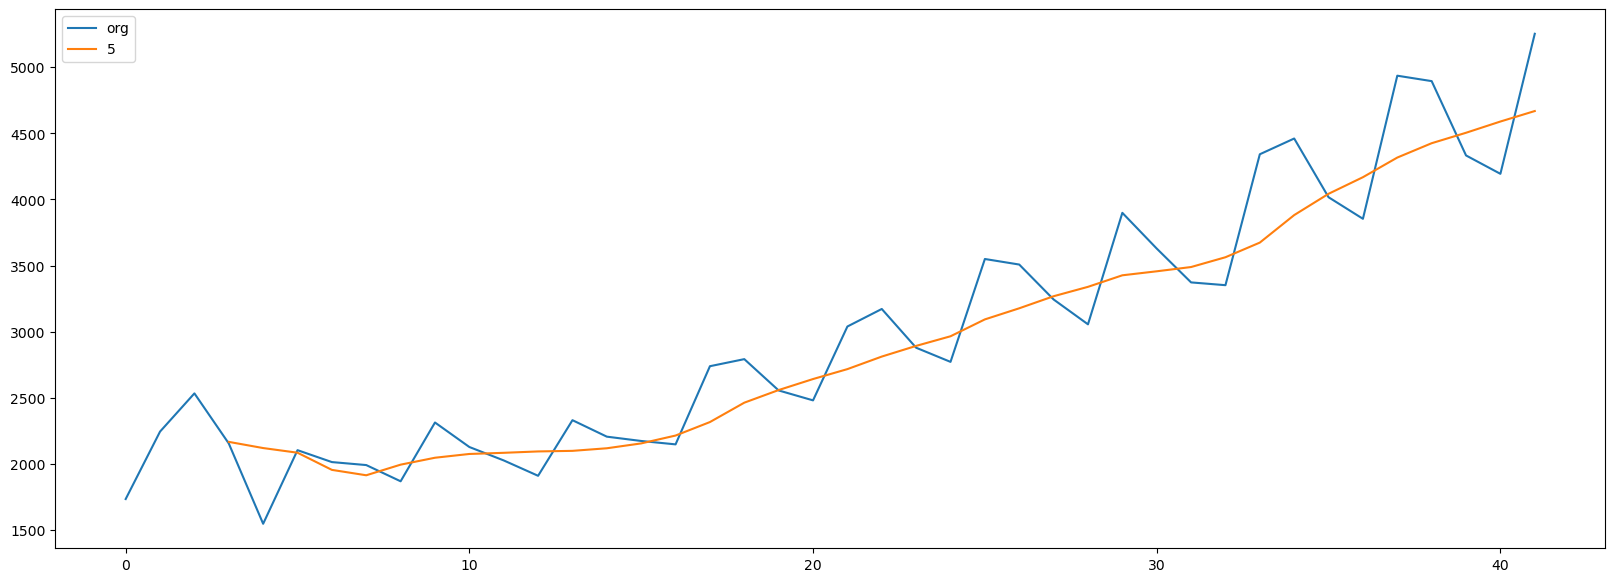

In [56]:
plt.figure(figsize=(20,7))
df['Sales'].plot(label="org")
df["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best');

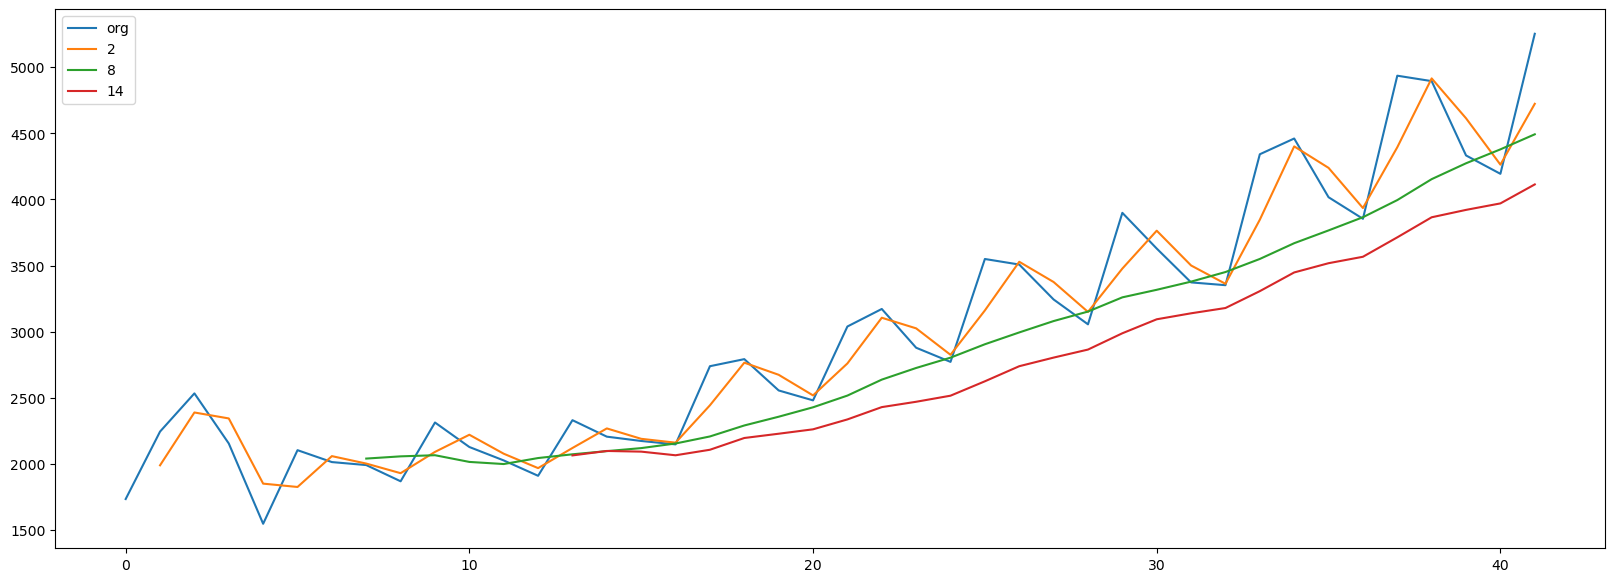

In [59]:
plt.figure(figsize=(20,7))
df['Sales'].plot(label="org")
for i in range(2,18,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

### 6) Time series decomposition plot

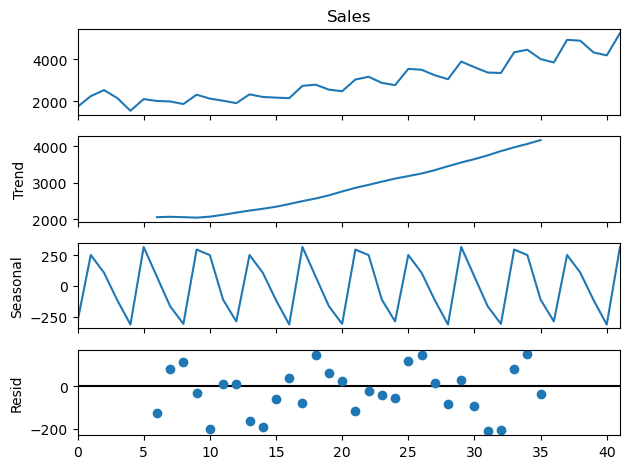

In [60]:
decompose_ts_add = seasonal_decompose(df['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

### 7) ACF plots and PACF plots

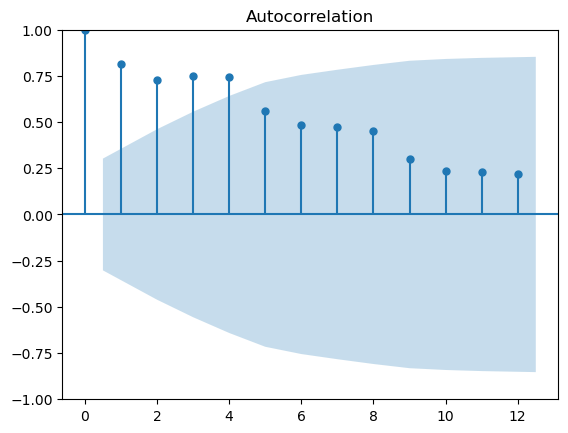

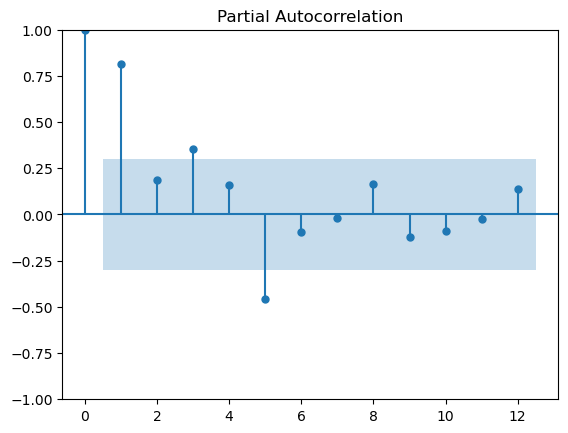

In [62]:
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

##### Evaluation Metric MAPE

In [63]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

##### Simple Exponential Method

In [64]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\Harshad Oak\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


16.404922356416872

##### Holt method

In [65]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\Harshad Oak\AppData\Local\Temp\ipykernel_24572\208563640.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\Harshad Oak\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


15.901867072128256

##### Holts winter exponential smoothing with additive seasonality and additive trend

In [66]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.241832544936149

##### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [67]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.692103335212899

### 8) Final Model

In [68]:
hwe_model_mul_add = ExponentialSmoothing(df["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
hwe_model_mul_add.forecast(7)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
dtype: float64